# SLOPP + creel benchmark

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys,os,json
sys.path.append(os.path.join("..",".."))

In [3]:
from benchmarks.utils import *
from benchmarks.problem_json import *
from src.models.single_bin_creel.anchor.model import AnchorSBMCreel
from src.models.single_bin_creel.guillotine.model import GuillotineSBMCreel
from src.models.single_bin_creel.guillotine_absolute_pos.model import GuillotineAbsolutePosSBMCreel

In [4]:
problems = [
    #(100,100),
    #(200,200),
    #(300,300),
    (100,400),
    #(200,450),
    #(100,900) 
]

nr_colorss = [1,2,3,4,5]

nr_item_types = [4,7,10]

minutes = 4

models = [AnchorSBMCreel, GuillotineSBMCreel, GuillotineAbsolutePosSBMCreel]

[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b=0)]), CompositeColor(ID=2, basic_colors=[Color(r=0, g=0, b=1)]), CompositeColor(ID=3, basic_colors=[Color(r=1, g=0, b=1)]), CompositeColor(ID=4, basic_colors=[Color(r=0, g=1, b=1)])]
[CompositeColor(ID=0, basic_colors=[Color(r=1, g=0, b=0)]), CompositeColor(ID=1, basic_colors=[Color(r=0, g=1, b

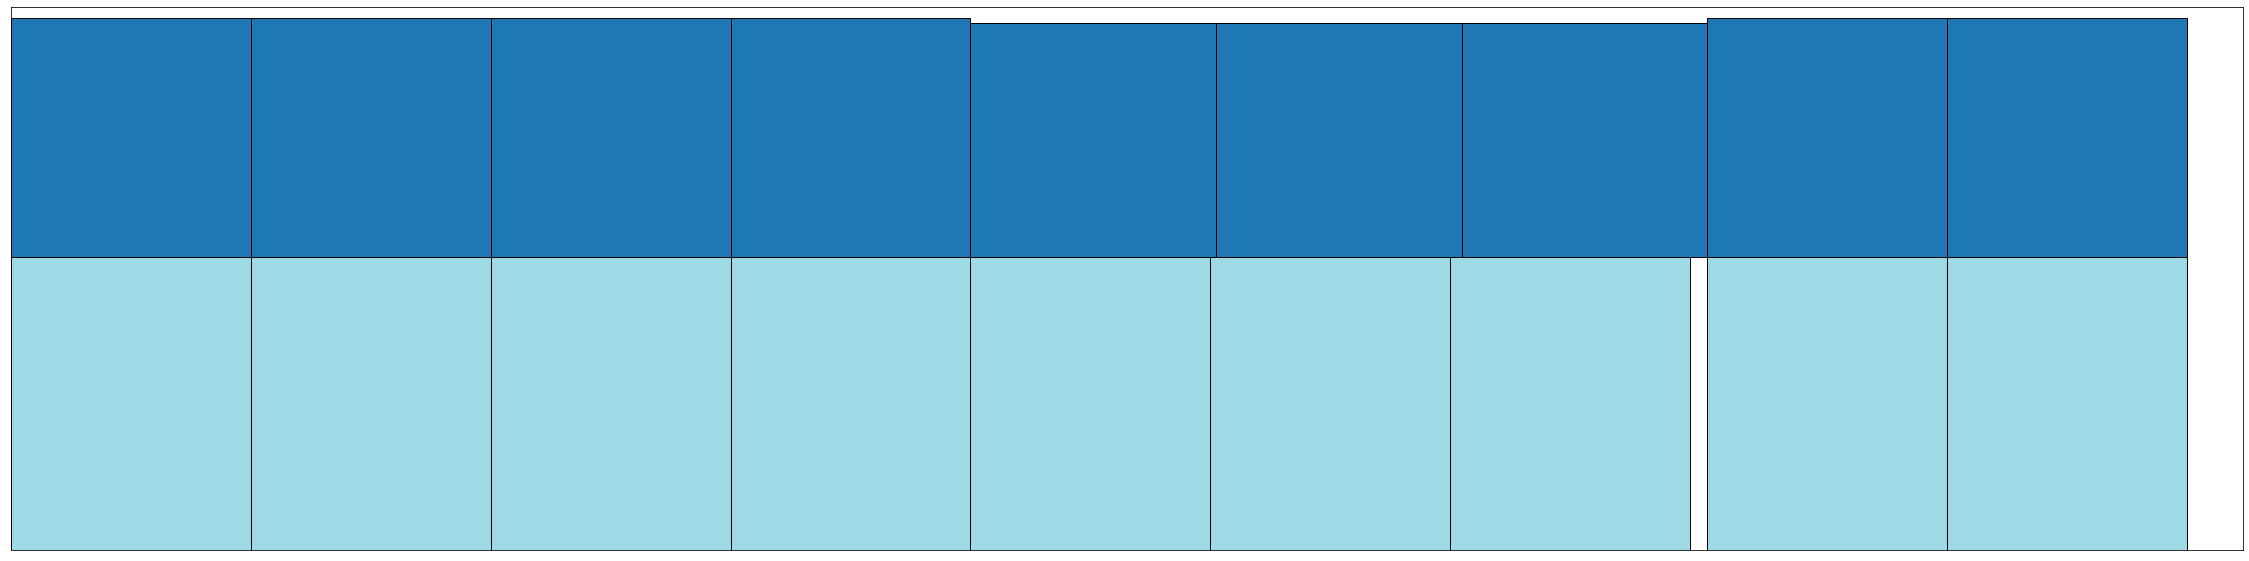

PROBLEM 4_100_400_1_1 {'widths': [83, 35, 24, 29], 'heights': [53, 27, 46, 37], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400, 'max_creel_colors': 1}, 'colors': [0, 1, 2, 3]}
Running model [<class 'src.models.single_bin_creel.guillotine.model.GuillotineSBMCreel'>]
Warning, timeout protection only supported on Linux!
nr constraints: 18088
Transferring...
Warning, timeout protection only supported on Linux!
Solving...
SAT True
TIME 80.0411396001
{'guillotine_constraints': {'nr_constraint': 18075, 'creation_time': 2.78378379996866}}
STATS SingleBinStats(objective=2426, nr_variables=8736, total_density=0.93935, constraints={'guillotine_constraints': {'nr_constraint': 18075, 'creation_time': 2.78378379996866}}, constraint_time=None, transfer_time=15.944569200044498, solve_time=60.55020529986359, total_time=80.0411396001, bin_length=400, fulfilled=[0, 25, 0, 13], counts=[0, 25, 0, 13])


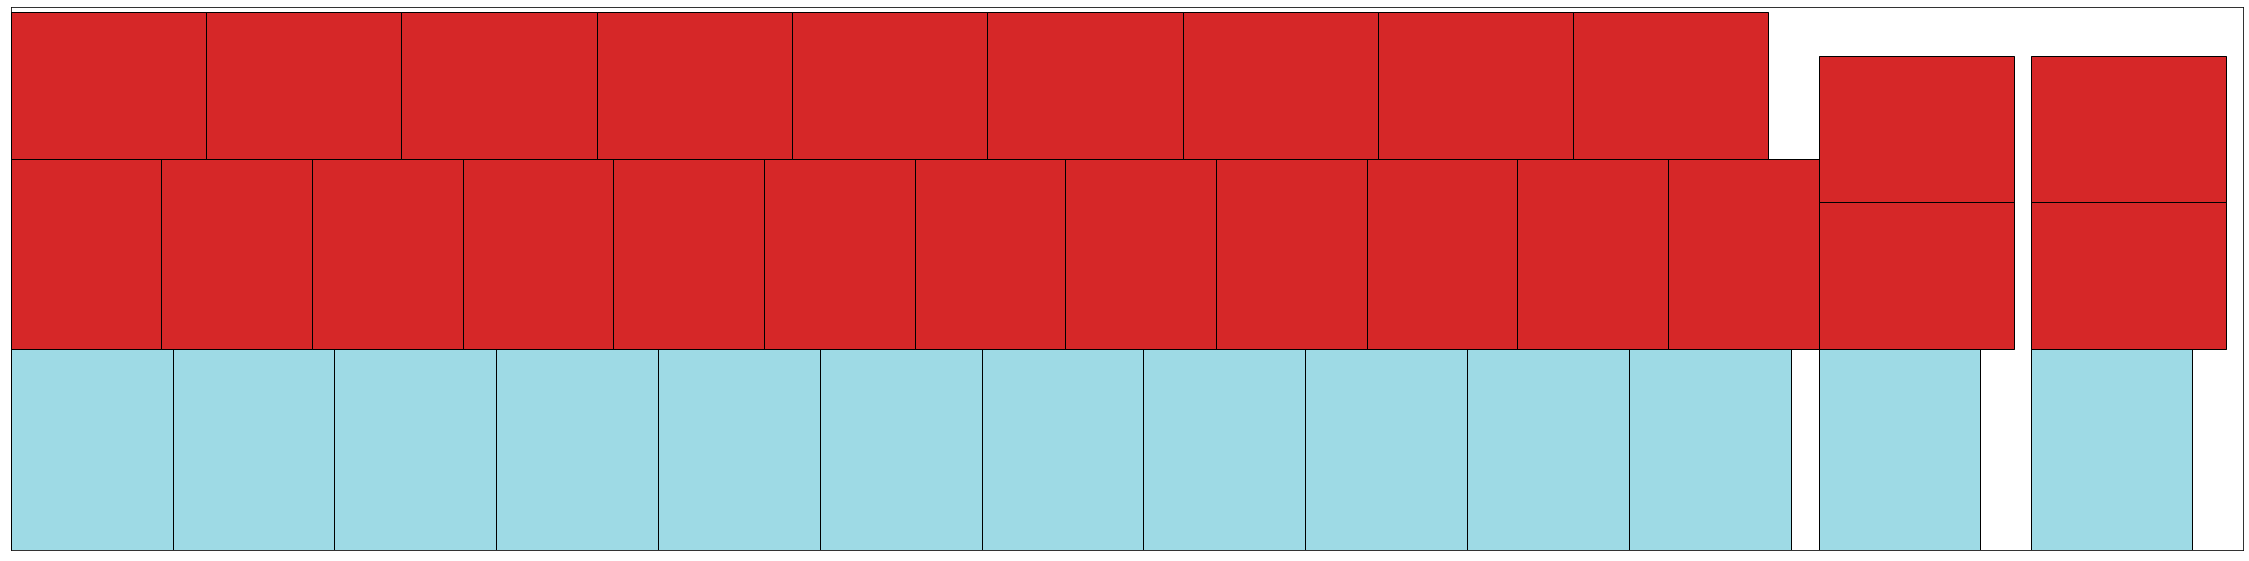

PROBLEM 4_100_400_1_2 {'widths': [37, 49, 37, 78], 'heights': [24, 28, 63, 57], 'machine_config': {'width': 100, 'min_length': 400, 'max_length': 400, 'max_creel_colors': 1}, 'colors': [0, 1, 2, 3]}
Running model [<class 'src.models.single_bin_creel.guillotine.model.GuillotineSBMCreel'>]
Warning, timeout protection only supported on Linux!
nr constraints: 17018
Transferring...
Warning, timeout protection only supported on Linux!


In [5]:
for nr_item_type in nr_item_types:
    for problem in problems:
        for nr_colors in nr_colorss:

            x, y = problem

            file_name = str(nr_item_type) + "_" + str(x) + "_" + str(y) + "_" + str(nr_colors)

            f = open(os.path.join(os.getcwd(), "problems", file_name + ".json"))
            data = json.load(f)

            run_single_bin_benchmark_repeated(models, (ProblemJsonCS.init_from_file(data)), max_time_seconds=60*minutes, nr_repeats=1)